In [17]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [18]:
folder_path="../final_results/Optim_results_raw/NN11"
folder_path="../final_results/Optim_results_raw/AAU"
station = folder_path.split('/')[-1]
if station == "NN11":
    station = "NN"
with open(f"{folder_path}/T_sc.pickle", 'rb') as f:
    T_sc = pickle.load(f)
f.close()
with open(f"{folder_path}/T_dl.pickle", "rb") as f:
    T_dl= pickle.load(f)
f.close()
# with open(f"{folder_path}/T_gw.pickle", "rb") as f:
#     T_gw=pickle.load(f)
# f.close()
with open(f"{folder_path}/T_idle.pickle", "rb") as f:
    T_idle = pickle.load(f)
f.close()
with open(f"{folder_path}/outage_los.pickle", "rb") as f:
    outage_los = pickle.load(f)
f.close()
with open(f"{folder_path}/Rdl.pickle", "rb") as f:
    Rdl = pickle.load(f)
f.close()
with open(f"{folder_path}/Rsc.pickle", "rb") as f:
    Rsc = pickle.load(f)
f.close()

N=len(T_sc)

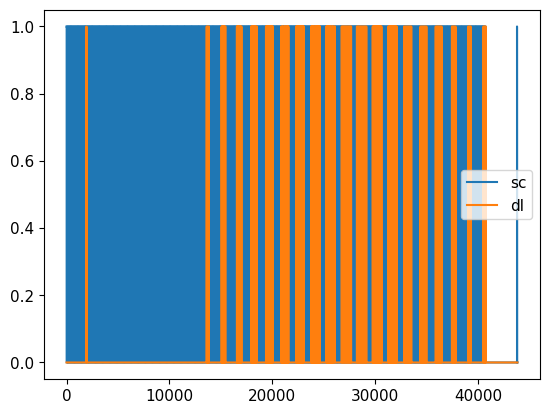

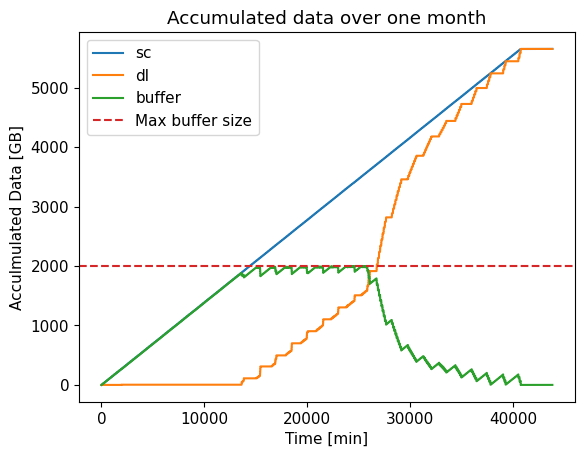

In [19]:
buffer=0
buffer_size = 8*250 * 1e9/1e9
sc_cumsum = (np.cumsum(T_sc)*Rsc+buffer)/1e9
dl_cumsum = np.cumsum(T_dl)*Rdl/1e9
# gw_cumsum = np.cumsum(T_gw)*Rgw

plt.step(range(len(T_dl)), T_sc, label = 'sc')
plt.step(range(len(T_dl)), T_dl, label = 'dl')
# plt.step(range(len(T_dl)), T_gw, label = 'gw')
plt.legend()
plt.show()
plt.step(range(len(T_dl)), sc_cumsum, label = 'sc')
plt.step(range(len(T_dl)), dl_cumsum, label = 'dl')
# plt.step(range(len(T_dl)), gw_cumsum, label = 'gw')
plt.step(range(len(T_dl)), sc_cumsum + buffer - dl_cumsum, label = 'buffer')
plt.axhline(buffer_size, c='tab:red', linestyle='--', label='Max buffer size')
# plt.step(range(len(T_dl)), sc_cumsum + buffer - gw_cumsum- dl_cumsum, label = 'buffer')
plt.legend()
plt.xlabel("Time [min]")
plt.ylabel("Acculmulated Data [GB]")
plt.title("Accumulated data over one month")
plt.savefig("raw_data_month.png")
plt.show()

[False False False ... False False False]
[False False False ... False False False]
1582
1581
total cost: 5654.094782356023


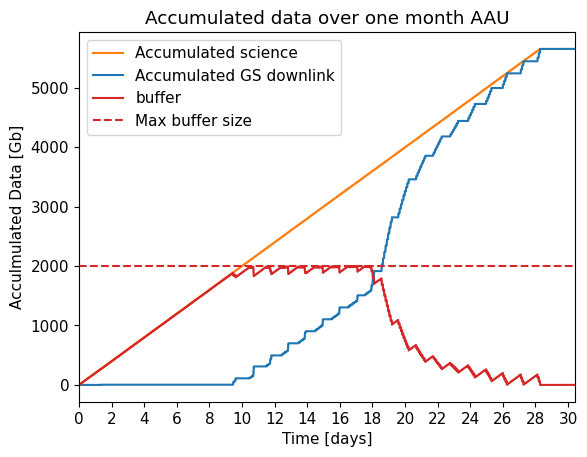

In [20]:
def plot_rectagles(lst, color='tab:blue', alpha=0.3, label=None):
    in_region = False
    start = 0
    label_added = False  # Track if label has been added

    for i, val in enumerate(lst + [False]):
        if val and not in_region:
            start = i
            in_region = True
        elif not val and in_region:
            if label and not label_added:
                plt.axvspan(start-1, i-1, color=color, alpha=alpha, label=label)
                label_added = True
            else:
                plt.axvspan(start-1, i-1, color=color, alpha=alpha)
            in_region = False


T_dl = T_dl.astype(bool)
print(outage_los)
print(T_dl)
print(sum(T_dl))
print(sum(T_dl&outage_los[:len(T_dl)]))
outages=T_dl&(outage_los[:len(T_dl)]==False)
if station=="NN":
    folder_path="../station_NN11_rate_404820636"
else:
    folder_path="../station_AAU_rate_59677090"
with open(f"{folder_path}/los.pickle", 'rb') as f:
    los = pickle.load(f)
with open(f"{folder_path}/rd_raw.pickle", "rb") as f:
    rd_raw = pickle.load(f)
f.close()

cost_gs=1
total_cost=sum(T_dl)*Rdl*cost_gs
print("total cost:",total_cost/1e9)
# with open(f"{folder_path}/outage_los.pickle", 'rb') as f:
#     outage_los = pickle.load(f)
# f.close()
# outages=los&(outage_los==False)
# print("percent outages", sum(outages)/len(outages))
# print(np.where(outages==True))

plt.rcParams.update({'font.size': 11})
plt.step(range(len(T_dl)), sc_cumsum, label = 'Accumulated science', color="tab:orange")
plt.step(range(len(T_dl)), dl_cumsum, label = 'Accumulated GS downlink', color="tab:blue")
# plt.step(range(len(T_dl)), gw_cumsum, label = 'gw')
# plot_rectagles(outages, label='Outages')
plt.step(range(len(T_dl)), sc_cumsum + buffer - dl_cumsum, label = 'buffer', color="tab:red")
plt.axhline(buffer_size, c='tab:red', linestyle='--', label='Max buffer size', color="tab:red")
# plot_rectagles(los[:len(T_dl)]&(outage_los[:len(T_dl)]==False), label="Outages")
# plt.step(range(len(T_dl)), sc_cumsum + buffer - gw_cumsum- dl_cumsum, label = 'buffer')
plt.legend(loc="upper left")
plt.xticks(
    ticks=np.arange(0, len(T_dl), 2*24*60),
    labels=[str(int(i/(24*60))) for i in np.arange(0, len(T_dl), 2*24*60)]
)
plt.xlabel("Time [days]")
# plt.xlabel("Time [min]")
plt.xlim(0, len(T_dl))
plt.ylabel("Acculmulated Data [Gb]")
tmp="../../figs/"
plt.title(f"Accumulated data over one month {station}")
plt.savefig(f"{tmp}raw_data_month_{station}.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [21]:
if station=="NN":
    folder_path="../station_NN11_rate_404820636"
    C=1
else:
    folder_path="../station_AAU_rate_59677090"
    C=1/10
with open(f"{folder_path}/rd_raw.pickle", 'rb') as f:
    rd_raw = pickle.load(f)
f.close()
with open(f"{folder_path}/gwr.pickle", 'rb') as f:
    gwr = pickle.load(f)
f.close()
with open(f"{folder_path}/rs.pickle", 'rb') as f:
    rs = pickle.load(f)
f.close()
tot_dl=sum(T_dl)*Rdl
time_with_outages=T_dl&outage_los[:len(T_dl)]
tot_dl_outages=sum(time_with_outages)*rd_raw
end_buffer = tot_dl-tot_dl_outages
# print(Rdl/60, rd_raw/60, Rdl/rd_raw)
print("total dl, total dl outages, factor between")
print(tot_dl/1e9, tot_dl_outages/1e9, tot_dl_outages/tot_dl)
print(len(T_dl))
print(sum(T_dl)*C)

total dl, total dl outages, factor between
5654.094782356023 5660.968843636364 1.0012157668990256
43800
158.20000000000002
